## Import libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Exploratory Data Analysis 

In [2]:
train_path = 'data/train.csv'
test_path = 'data/test.csv'
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
target_column = 'SalePrice'
common_columns = set(train_data.columns) & set(test_data.columns)
all_columns = list(common_columns) + [target_column]
train_data_selected = train_data[all_columns]
data = pd.concat([train_data_selected, test_data], ignore_index=True)

In [3]:
'''data_test = pd.read_csv('data/test.csv')
data_train = pd.read_csv('data/train.csv')
data=pd.concat([data_train,data_test],axis=0)
data.to_csv('all_data.csv',index=False)'''

"data_test = pd.read_csv('data/test.csv')\ndata_train = pd.read_csv('data/train.csv')\ndata=pd.concat([data_train,data_test],axis=0)\ndata.to_csv('all_data.csv',index=False)"

In [4]:
data.head()

,BldgType,ScreenPorch,MiscFeature,BsmtCond,YearRemodAdd,BsmtUnfSF,Exterior2nd,Fireplaces,BsmtQual,Id,...,SaleCondition,Heating,KitchenQual,LowQualFinSF,MiscVal,BsmtExposure,BsmtFinSF2,GarageFinish,LandContour,SalePrice
0,1Fam,0,NaN,TA,2003,150.0,VinylSd,0,Gd,1,...,Normal,GasA,Gd,0,0,No,0.0,RFn,Lvl,208500.0
1,1Fam,0,NaN,TA,1976,284.0,MetalSd,1,Gd,2,...,Normal,GasA,TA,0,0,Gd,0.0,RFn,Lvl,181500.0
2,1Fam,0,NaN,TA,2002,434.0,VinylSd,1,Gd,3,...,Normal,GasA,Gd,0,0,Mn,0.0,RFn,Lvl,223500.0
3,1Fam,0,NaN,Gd,1970,540.0,Wd Shng,1,TA,4,...,Abnorml,GasA,Gd,0,0,No,0.0,Unf,Lvl,140000.0
4,1Fam,0,NaN,TA,2000,490.0,VinylSd,1,Gd,5,...,Normal,GasA,Gd,0,0,Av,0.0,RFn,Lvl,250000.0


In [5]:
data.columns

Index(['BldgType', 'ScreenPorch', 'MiscFeature', 'BsmtCond', 'YearRemodAdd',
       'BsmtUnfSF', 'Exterior2nd', 'Fireplaces', 'BsmtQual', 'Id',
       'CentralAir', 'BedroomAbvGr', 'BsmtFullBath', 'Functional', 'LotConfig',
       '2ndFlrSF', 'TotRmsAbvGrd', 'PoolArea', 'GarageType', 'GarageCars',
       'ExterQual', 'GarageArea', '1stFlrSF', 'Utilities', 'MoSold',
       'MSSubClass', 'OverallCond', 'Neighborhood', 'HeatingQC', 'PavedDrive',
       'LotArea', 'LandSlope', 'RoofMatl', 'FullBath', 'PoolQC',
       'BsmtFinType2', 'WoodDeckSF', 'BsmtHalfBath', 'GarageCond', '3SsnPorch',
       'RoofStyle', 'YearBuilt', 'LotShape', 'Fence', 'OverallQual',
       'Foundation', 'Exterior1st', 'Condition2', 'MSZoning', 'Condition1',
       'EnclosedPorch', 'LotFrontage', 'MasVnrType', 'TotalBsmtSF',
       'GarageQual', 'MasVnrArea', 'ExterCond', 'FireplaceQu', 'KitchenAbvGr',
       'BsmtFinSF1', 'Street', 'HouseStyle', 'Electrical', 'Alley',
       'OpenPorchSF', 'YrSold', 'GrLivArea', 'Bs

In [6]:
data.shape

(2919, 81)

### Distribution

<Axes: >

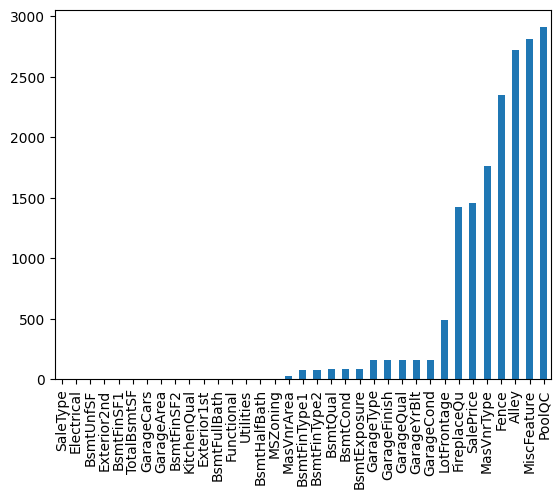

In [7]:
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data.sort_values(inplace=True)
missing_data.plot.bar()

those are the columns that have missing values. Specifically, Fence, Alley, MiscFeature and PoolQC have a very high number of missing features.

C:\Users\nours\AppData\Local\Temp\ipykernel_2468\4210756226.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'], bins=20)


<Axes: xlabel='SalePrice', ylabel='Density'>

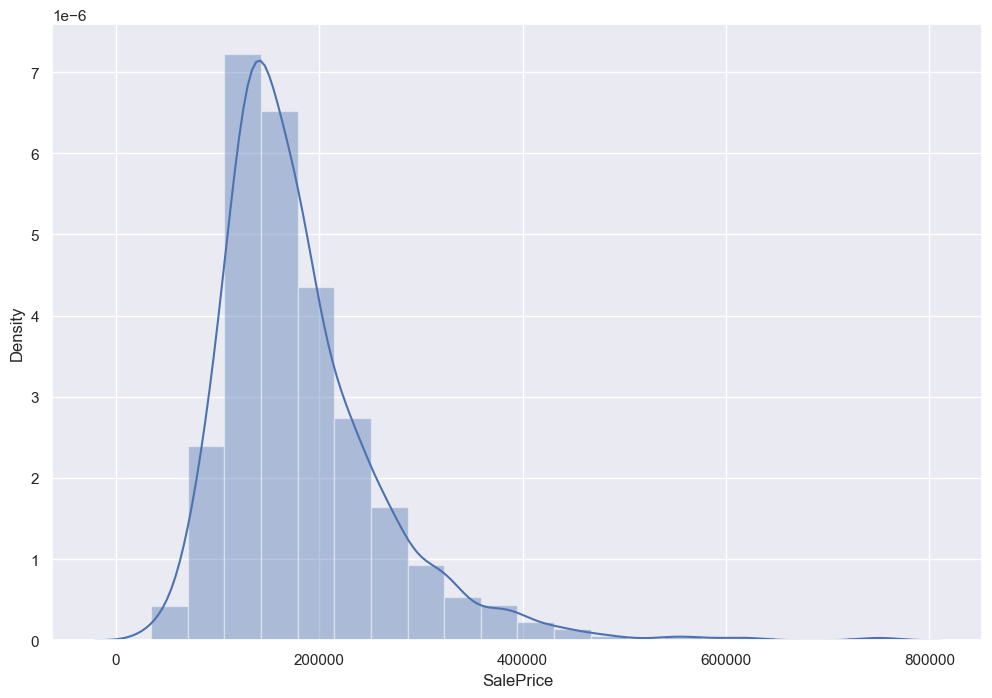

In [8]:
sns.set(rc = {'figure.figsize':(12, 8)})
sns.distplot(data['SalePrice'], bins=20)

The graph of the SalePrice presents a right tail, this means that we have a right-skewed distribution (the majority of the house prices are clustered on the lower end, and the tail extends towards higher values)
Interpretation: while most houses are priced at the lower end, there are a few houses that are significantly more expensive. This could be due to various factors such as luxury features, prime locations or other unique characteristics

In [9]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

50% is the median
mean > median

### Correlation of certain features

The features are either categoricals or numeric, we cannot draw a correlation matrix for categorical features.

In [10]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['ScreenPorch', 'YearRemodAdd', 'BsmtUnfSF', 'Fireplaces', 'Id',
       'BedroomAbvGr', 'BsmtFullBath', '2ndFlrSF', 'TotRmsAbvGrd', 'PoolArea',
       'GarageCars', 'GarageArea', '1stFlrSF', 'MoSold', 'MSSubClass',
       'OverallCond', 'LotArea', 'FullBath', 'WoodDeckSF', 'BsmtHalfBath',
       '3SsnPorch', 'YearBuilt', 'OverallQual', 'EnclosedPorch', 'LotFrontage',
       'TotalBsmtSF', 'MasVnrArea', 'KitchenAbvGr', 'BsmtFinSF1',
       'OpenPorchSF', 'YrSold', 'GrLivArea', 'HalfBath', 'GarageYrBlt',
       'LowQualFinSF', 'MiscVal', 'BsmtFinSF2', 'SalePrice'],
      dtype='object')

In [11]:
category_features = data.select_dtypes(include=[object])
category_features.columns

Index(['BldgType', 'MiscFeature', 'BsmtCond', 'Exterior2nd', 'BsmtQual',
       'CentralAir', 'Functional', 'LotConfig', 'GarageType', 'ExterQual',
       'Utilities', 'Neighborhood', 'HeatingQC', 'PavedDrive', 'LandSlope',
       'RoofMatl', 'PoolQC', 'BsmtFinType2', 'GarageCond', 'RoofStyle',
       'LotShape', 'Fence', 'Foundation', 'Exterior1st', 'Condition2',
       'MSZoning', 'Condition1', 'MasVnrType', 'GarageQual', 'ExterCond',
       'FireplaceQu', 'Street', 'HouseStyle', 'Electrical', 'Alley',
       'BsmtFinType1', 'SaleType', 'SaleCondition', 'Heating', 'KitchenQual',
       'BsmtExposure', 'GarageFinish', 'LandContour'],
      dtype='object')

In [12]:
correlation = numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending=False), '\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

we printed the correlation of SalePrice (target) to the other numeric variables, and it seems that it is mostly correlated (dependant on) with OverallQual

<Axes: title={'center': 'Correlation of Numeric Features with Sale Price'}>

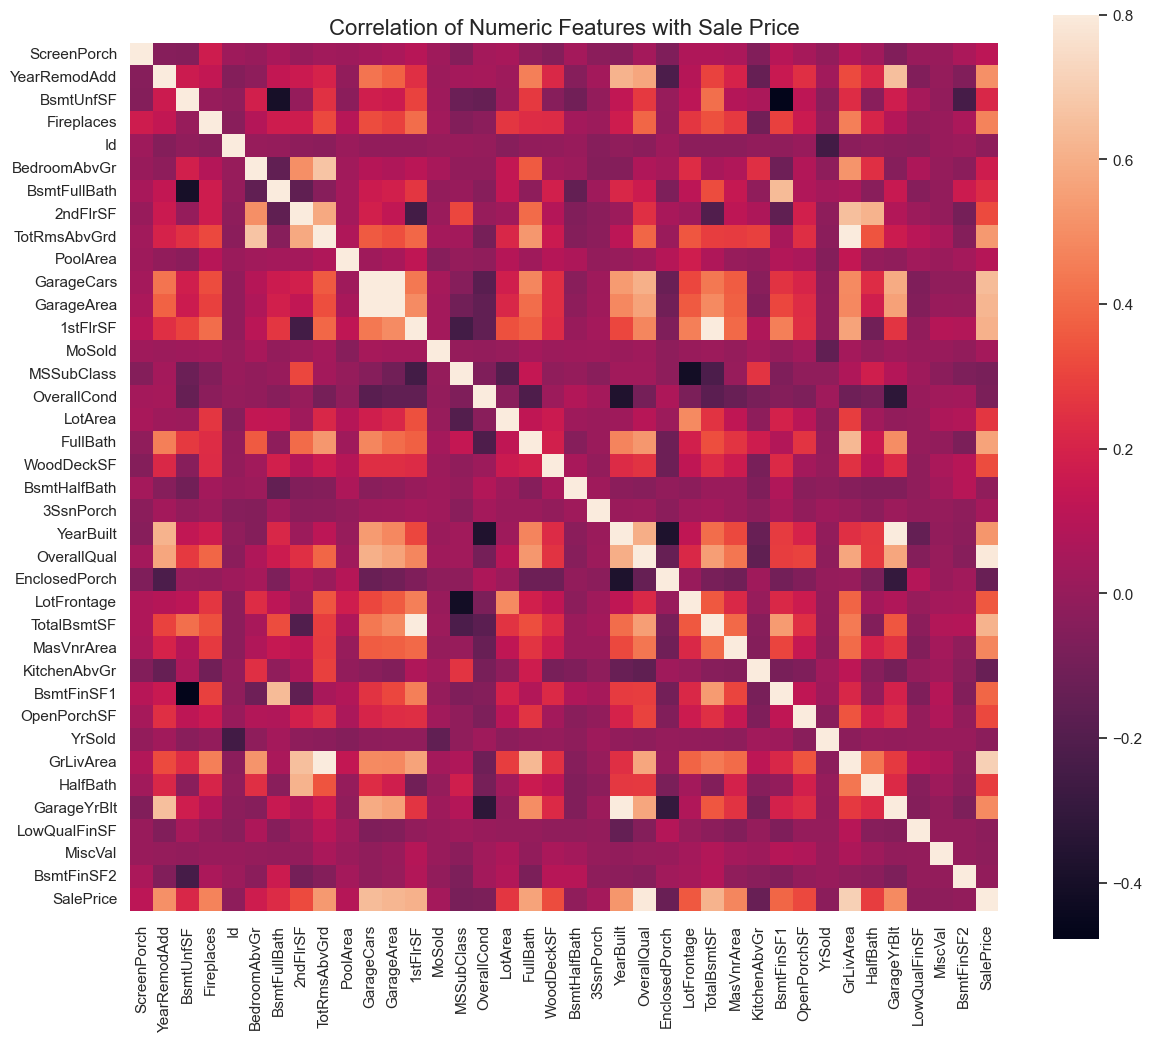

In [13]:
f, ax = plt.subplots(figsize=(14, 12))
plt.title('Correlation of Numeric Features with Sale Price', y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8)

we plotted the heat map that presents the correlation of the numeric features. The closer the color is to the white, the more the features are correlated. the darker the color, the more the features are correlated in a negative way. the diagonal is white because the feature is mostly correlated with itself (corr = 1)

In [14]:
data['GarageCars']=data['GarageCars'].fillna(data['GarageCars'].mode()[0])
data['GarageArea']=data['GarageArea'].fillna(data['GarageArea'].mode()[0])
data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mode()[0])

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


<Axes: >

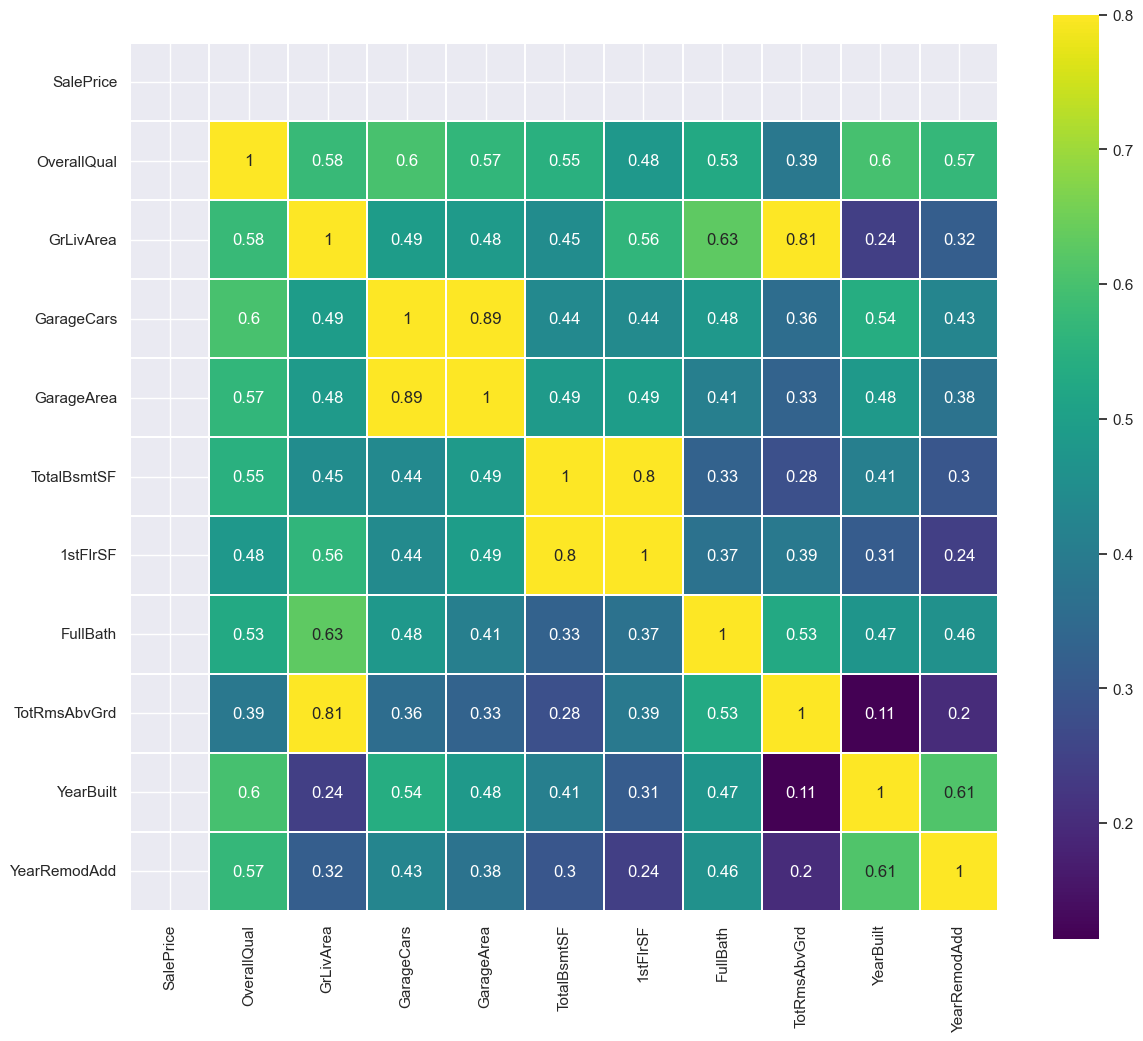

In [15]:
# Top 11 Heatmap
k = 11
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(data[cols].values.T)
#print(cm)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(cm, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='viridis',
            linecolor='white', xticklabels=cols.values, annot_kws={'size': 12}, yticklabels=cols.values)

We need to figure out the correlation to remove multi-colinearity (when two features are highly correlated with the target variable and they are also highly correlated with themselves), they distroy the model because of very low variance. exple: GarageArea and GarageCars

We remove one of the multi-colinear features
GarageCars have a higher correlation with SalesPrice than GarageArea so we can remove GarageArea

### Scatterplot

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

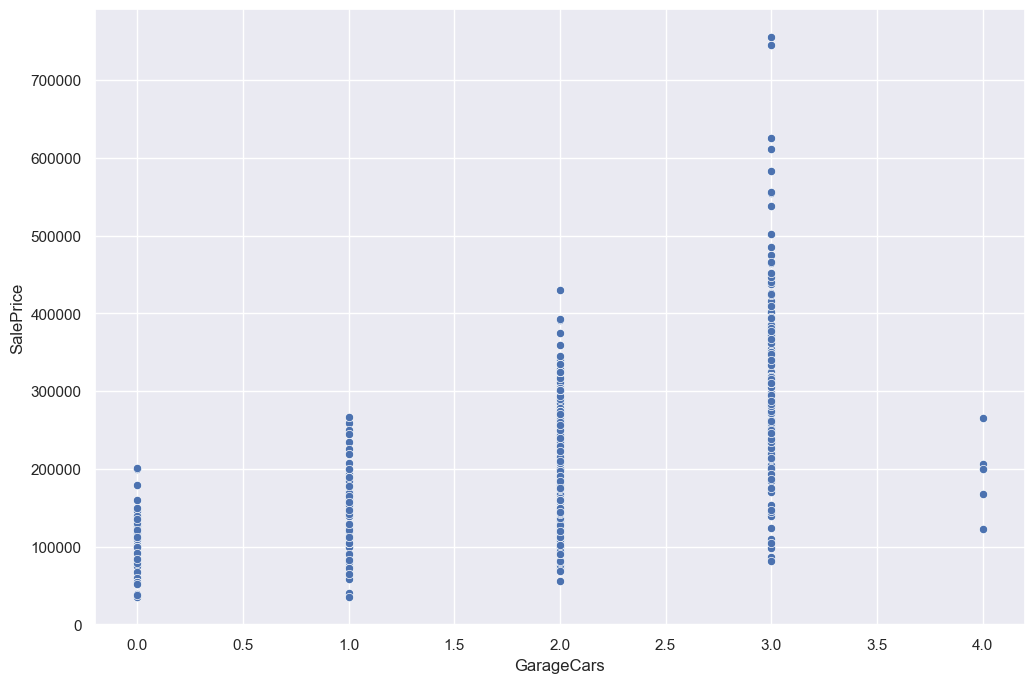

In [16]:
sns.scatterplot(x='GarageCars', y='SalePrice', data=data)

When we have 0 GarageCars the house price is very low and it is maximal when we have 3 GarageCars. While it is low when we have 4, probably because the houses could be on the country side

<Axes: xlabel='WoodDeckSF', ylabel='SalePrice'>

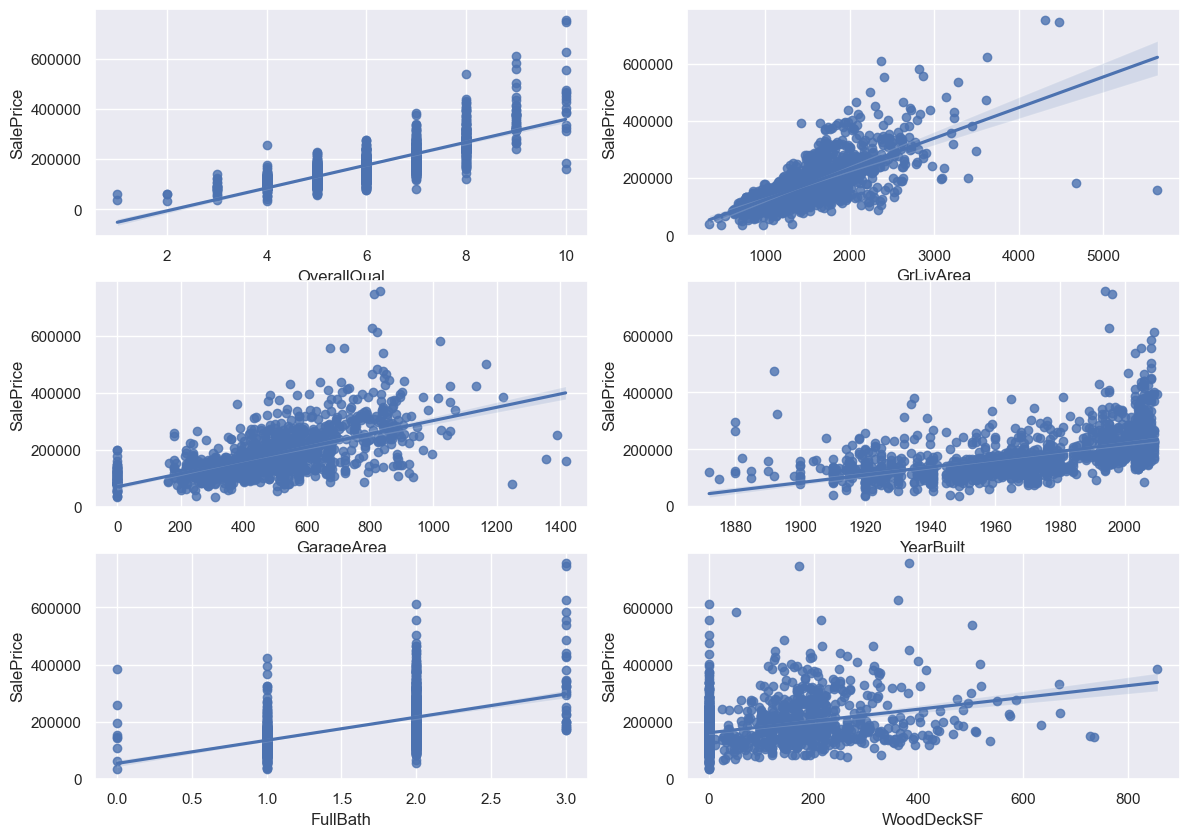

In [17]:
# Scatter plots between the most correlated features
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
sns.regplot(x='OverallQual', y='SalePrice', data=data, scatter=True, fit_reg=True ,ax=ax1)
sns.regplot(x='GrLivArea', y='SalePrice', data=data, scatter=True, fit_reg=True, ax=ax2)
sns.regplot(x='GarageArea', y='SalePrice', data=data, scatter=True, fit_reg=True, ax=ax3)
sns.regplot(x='YearBuilt', y='SalePrice', data=data, scatter=True, fit_reg=True, ax=ax4)
sns.regplot(x='FullBath', y='SalePrice', data=data, scatter=True, fit_reg=True, ax=ax5)
sns.regplot(x='WoodDeckSF', y='SalePrice', data=data, scatter=True, fit_reg=True, ax=ax6)

There are two values in the livingArea plot that indicate the having bigger area gives you a lower price. these may affect the model = a few properties that are falling out of pattern (outliers)

### Boxplots

Five number summary: Sample Minimum, the lower quartile, the median, the upper quartile or the third quartile and the sample maximum.

<Axes: xlabel='SalePrice'>

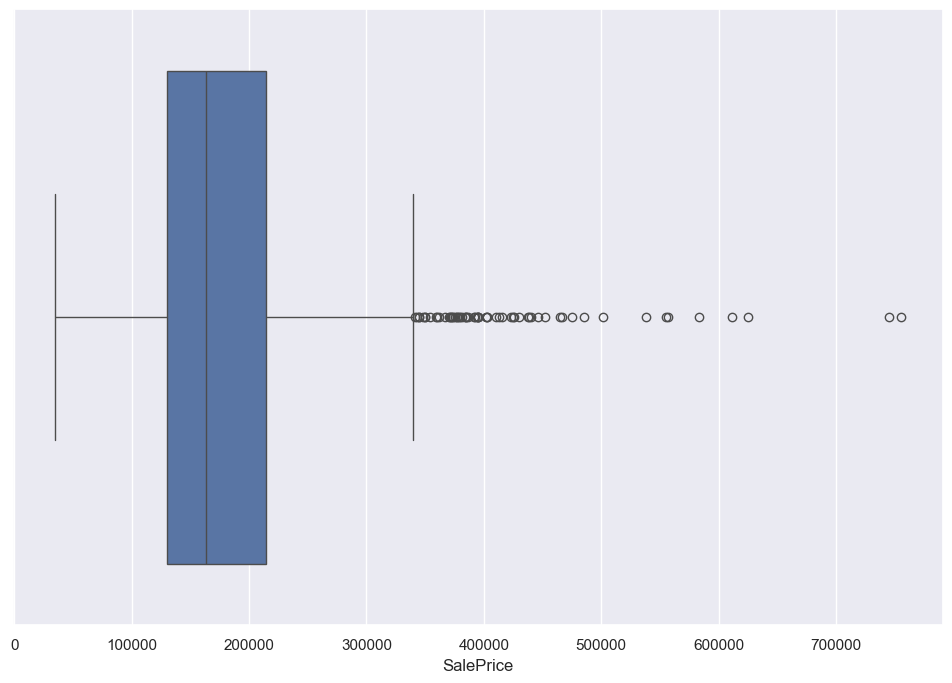

In [18]:
sns.boxplot(x= data['SalePrice'])

(-0.5, 9.5, 0.0, 800000.0)

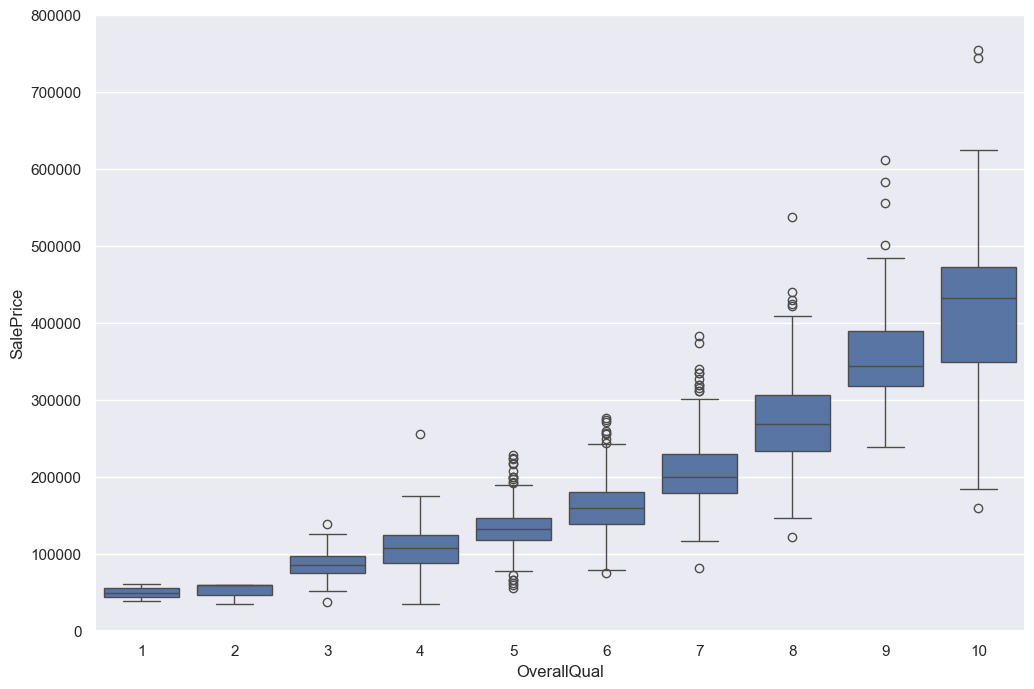

In [19]:
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

### Remove Outliers

In [20]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [21]:
data.shape

(2919, 81)

In [22]:
first_quartile = data['SalePrice'].quantile(0.25)
third_quartile = data['SalePrice'].quantile(0.75)
IQR = third_quartile - first_quartile

In [23]:
new_boundry = third_quartile + 3 * IQR

In [24]:
data.drop(data[data['SalePrice'] > new_boundry].index, axis= 0, inplace=True)

In [25]:
data.shape

(2907, 81)

<Axes: xlabel='SalePrice'>

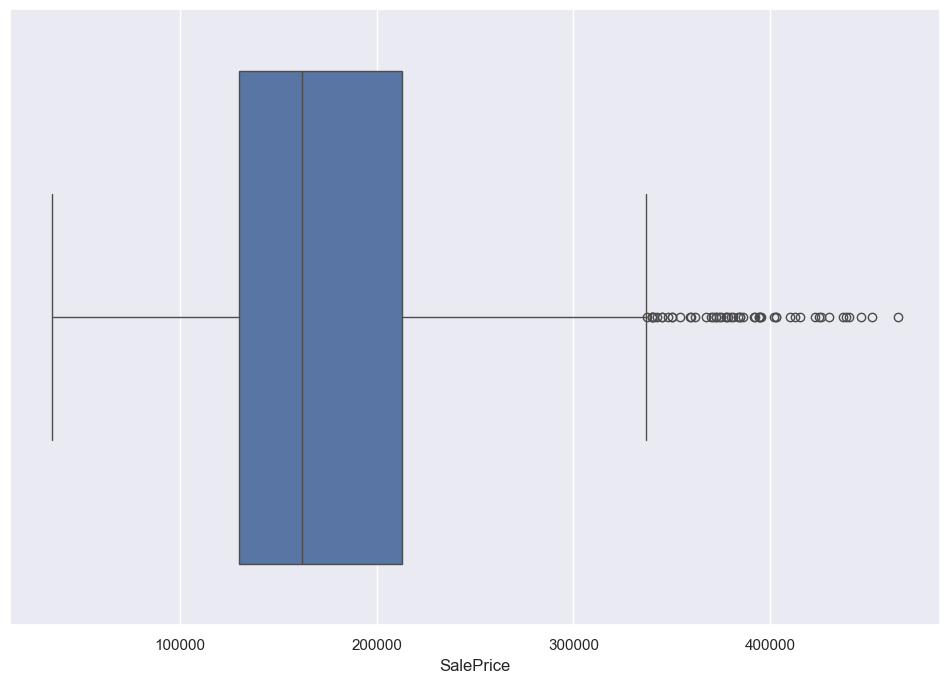

In [26]:
sns.boxplot(x= data['SalePrice'])

# Remove bad features from the data

Multicolinear features:
* GarageArea <-> GarageCars
* TotalBsmtSF <-> 1stFlrSF
* TotRmAbvGrd <-> GrLivArea
* GrLiveArea <-> FullBath <br>

Features with missing values more than 20%: <br>  
* FireplaceQu 47%
* Fence 80%
* Alley >90%
* MiscFeature >90%
* PoolQC >90% 
<br>

Features with poor correlation with target feature (SalePrice): <br>
* LotFrontage
* WoodDeckSF
* 2ndFlrSF
* OpenPorchSF
* HalfBath
* LotArea
* BedroomAbvGr ScreenPorch
* PoolArea
* MoSold
* 3SsnPorch
* BsmtHalfBath
* MiscVal
* Id
* LowQualFinSF
* YrSold
* OverallCond
* MSSubClass
* EnclosedPorch
* KitchenAbvGr

29 columns to drop

In [27]:
data.columns

Index(['BldgType', 'ScreenPorch', 'MiscFeature', 'BsmtCond', 'YearRemodAdd',
       'BsmtUnfSF', 'Exterior2nd', 'Fireplaces', 'BsmtQual', 'Id',
       'CentralAir', 'BedroomAbvGr', 'BsmtFullBath', 'Functional', 'LotConfig',
       '2ndFlrSF', 'TotRmsAbvGrd', 'PoolArea', 'GarageType', 'GarageCars',
       'ExterQual', 'GarageArea', '1stFlrSF', 'Utilities', 'MoSold',
       'MSSubClass', 'OverallCond', 'Neighborhood', 'HeatingQC', 'PavedDrive',
       'LotArea', 'LandSlope', 'RoofMatl', 'FullBath', 'PoolQC',
       'BsmtFinType2', 'WoodDeckSF', 'BsmtHalfBath', 'GarageCond', '3SsnPorch',
       'RoofStyle', 'YearBuilt', 'LotShape', 'Fence', 'OverallQual',
       'Foundation', 'Exterior1st', 'Condition2', 'MSZoning', 'Condition1',
       'EnclosedPorch', 'LotFrontage', 'MasVnrType', 'TotalBsmtSF',
       'GarageQual', 'MasVnrArea', 'ExterCond', 'FireplaceQu', 'KitchenAbvGr',
       'BsmtFinSF1', 'Street', 'HouseStyle', 'Electrical', 'Alley',
       'OpenPorchSF', 'YrSold', 'GrLivArea', 'Bs

In [28]:
cols_to_drop = [
    'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'GrLivArea', 'FullBath',
    'FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC',
    'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea',
    'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch',
    'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'YrSold',
    'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr', 'MasVnrType'
]
len(cols_to_drop)

32

In [29]:
data.drop(cols_to_drop, axis=1, inplace=True)

In [30]:
data.shape

(2907, 49)

# Handle Missing Values

In [31]:
data.isna().sum()

BldgType            0
BsmtCond           82
YearRemodAdd        0
BsmtUnfSF           1
Exterior2nd         1
Fireplaces          0
BsmtQual           81
CentralAir          0
BsmtFullBath        2
Functional          2
LotConfig           0
GarageType        157
GarageCars          0
ExterQual           0
Utilities           2
Neighborhood        0
HeatingQC           0
PavedDrive          0
LandSlope           0
RoofMatl            0
BsmtFinType2       80
GarageCond        159
RoofStyle           0
YearBuilt           0
LotShape            0
OverallQual         0
Foundation          0
Exterior1st         1
Condition2          0
MSZoning            4
Condition1          0
GarageQual        159
MasVnrArea         23
ExterCond           0
BsmtFinSF1          1
Street              0
HouseStyle          0
Electrical          1
BsmtFinType1       79
SaleType            1
GarageYrBlt       159
SaleCondition       0
Heating             0
KitchenQual         1
BsmtExposure       82
BsmtFinSF2

In [32]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

In [33]:
category_columns = data.select_dtypes(include=[object]).columns
data[category_columns] = data[category_columns].fillna(data[category_columns].mode().iloc[0])

In [34]:
data.isna().sum()

BldgType         0
BsmtCond         0
YearRemodAdd     0
BsmtUnfSF        0
Exterior2nd      0
Fireplaces       0
BsmtQual         0
CentralAir       0
BsmtFullBath     0
Functional       0
LotConfig        0
GarageType       0
GarageCars       0
ExterQual        0
Utilities        0
Neighborhood     0
HeatingQC        0
PavedDrive       0
LandSlope        0
RoofMatl         0
BsmtFinType2     0
GarageCond       0
RoofStyle        0
YearBuilt        0
LotShape         0
OverallQual      0
Foundation       0
Exterior1st      0
Condition2       0
MSZoning         0
Condition1       0
GarageQual       0
MasVnrArea       0
ExterCond        0
BsmtFinSF1       0
Street           0
HouseStyle       0
Electrical       0
BsmtFinType1     0
SaleType         0
GarageYrBlt      0
SaleCondition    0
Heating          0
KitchenQual      0
BsmtExposure     0
BsmtFinSF2       0
GarageFinish     0
LandContour      0
SalePrice        0
dtype: int64

# Split Data

In [35]:
X = data.iloc[:, :48].values
y = data.iloc[:, 48].values
print(y)

[208500.         181500.         223500.         ... 177657.07044199
 177657.07044199 177657.07044199]


In [36]:
len(X)

2907

# One Hot Encoding

In [37]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_column_indices = [data.columns.get_loc(col) for col in categorical_columns]

In [38]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X[:, categorical_column_indices])
categorical_column_indices_str = list(map(str, categorical_column_indices))
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_column_indices_str)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)
X = np.delete(X, categorical_column_indices, axis=1)
X = np.concatenate((X, X_encoded_df), axis=1)
print("X after One-Hot Encoding:")
print(X)

X after One-Hot Encoding:
[[2003 150.0 0 ... 0.0 0.0 1.0]
 [1976 284.0 1 ... 0.0 0.0 1.0]
 [2002 434.0 1 ... 0.0 0.0 1.0]
 ...
 [1996 0.0 1 ... 0.0 0.0 1.0]
 [1992 575.0 0 ... 0.0 0.0 1.0]
 [1994 238.0 1 ... 0.0 0.0 1.0]]


c:\Users\nours\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [39]:
#df_encoded = pd.get_dummies(final_df, columns=categorical_columns, drop_first=True)

In [40]:
#final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [41]:
#df_encoded.shape

# Split into train/test

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
knn_regressor = KNeighborsRegressor(n_neighbors=53)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)

In [46]:
r2score = r2_score(y_test, y_pred)
print("R2 Score: ", r2score)

R2 Score:  0.24557847902860952
